In [12]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
len(x_train)

60000

In [15]:
len(x_test)

10000

In [16]:
x_test[0].shape

(28, 28)

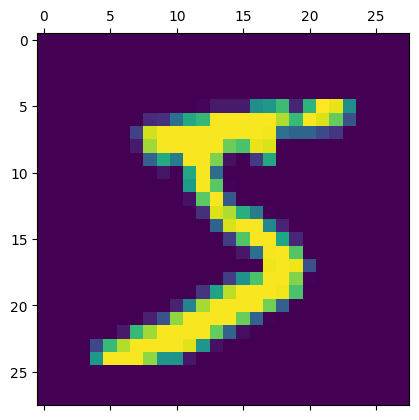

In [17]:
plt.matshow(x_train[0])

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train/255.0
x_test = x_test/255.0

In [20]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
x_test_flatten.shape

(10000, 784)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5


c:\Documents\VS_code\tensorflow\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8141 - loss: 0.7129
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9141 - loss: 0.3113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9205 - loss: 0.2821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9238 - loss: 0.2756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2700


In [22]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9139 - loss: 0.3036


[0.2665313184261322, 0.9259999990463257]

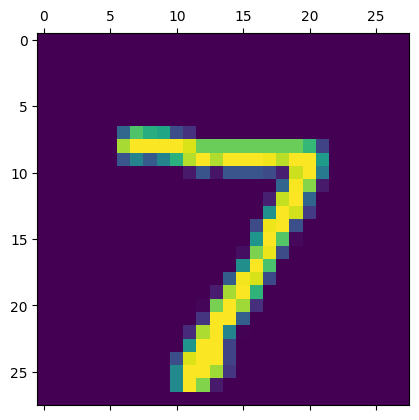

In [23]:
plt.matshow(x_test[0])

In [34]:
y_predicted = model.predict(x_test_flatten)
np.argmax(y_predicted[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


np.int64(7)

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]